In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Bài 1

In [25]:
def grad(x):
    return 2*x


def loss(x):
    return x**2


def gd(x, lr=0.4):
    x_hist = [x]
    loss_hist = [loss(x)]
    
    for i in range(100):
        x = x - lr*grad(x)
        if abs(grad(x)) < 1e-9:
            break
        x_hist.append(x)
        loss_hist.append(loss(x))

    return (x_hist, loss_hist)


Learning rate vừa đủ = 0.4

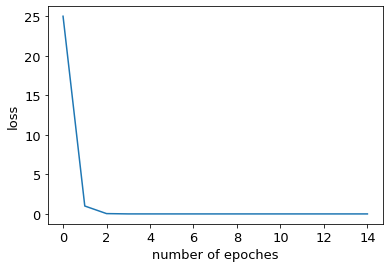

In [26]:
(x_hist, loss_hist) = gd(5, 0.4)

plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Learning rate vừa đủ = 0.5
<br/>
Trường hợp đặc biệt: hội tụ ngay lập tức

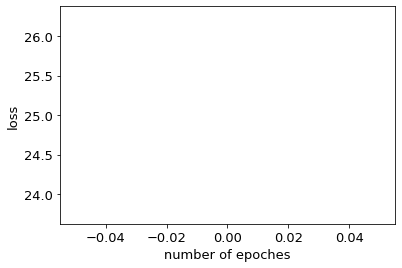

In [27]:
(x_hist, loss_hist) = gd(5, 0.5)

plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Learning rate nhỏ = 0.05

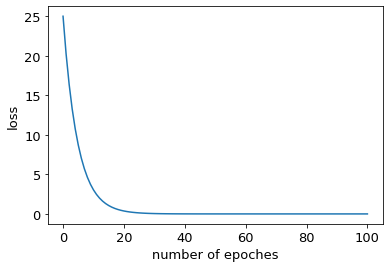

In [28]:
(x_hist, loss_hist) = gd(5, 0.05)

plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Learning rate lớn = 1
<br />
Trường hợp đặc biệt

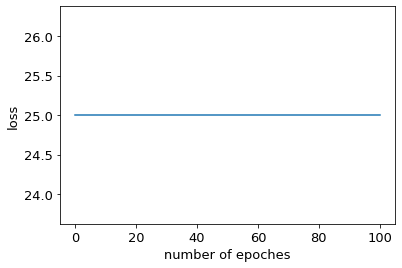

In [29]:
(x_hist, loss_hist) = gd(5, 1)

plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Learning rate rất lớn = 1.1

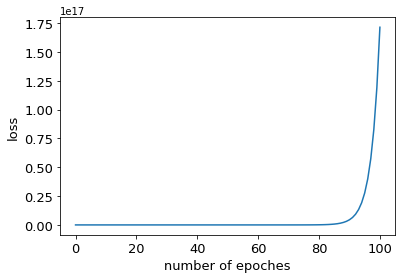

In [30]:
(x_hist, loss_hist) = gd(5, 1.1)

plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

# Bài 3

In [381]:
w = np.array([[2], [1]])

In [382]:
X = np.random.randint(50, size=100) + np.random.randn(100)
X = X.reshape(-1, 1)
ones = np.ones_like(X)
X = np.concatenate((X, ones), axis=1)
y = X.dot(w) + np.random.randn(100).reshape(-1, 1)
y = y.reshape(-1, 1)
N = X.shape[0]

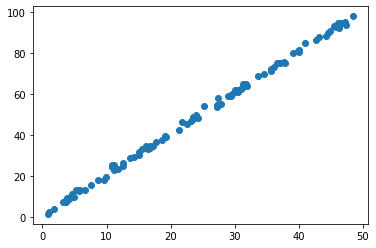

In [167]:
plt.scatter(X[:, 0], y)
plt.show()

Triển khai model

In [383]:
def loss(w):
    return 0.5/N * (np.linalg.norm(y-X.dot(w))**2)


def grad(w):
    return 1/N * X.T.dot(X.dot(w)-y)


def gd_linear(w, lr):
    loss_hist = [loss(w)]
    w_hist = [w]
    for i in range(10000):
        w_new = w_hist[-1] - lr*grad(w_hist[-1])
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        loss_hist.append(loss(w_new))
        w_hist.append(w_new)

    return (loss_hist, w_hist)


In [387]:
w_init = np.random.randn(2,1)
(loss_hist, w_hist) = gd_linear(w_init, 0.001)

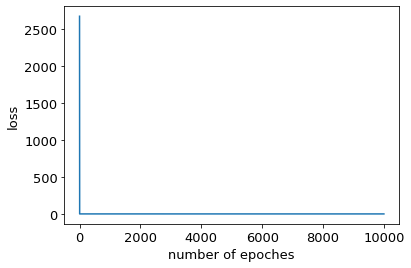

In [388]:
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

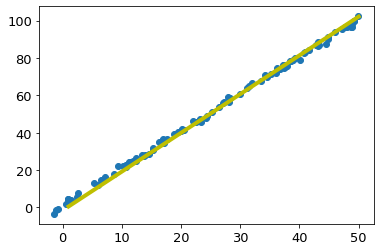

In [233]:
# Draw the fitting line
x0 = np.linspace(1, 50, 2, endpoint=True).reshape(-1,1)
x0 = np.concatenate((x0, np.ones_like(x0)), axis=1)
y0 = x0.dot(w_hist[-1])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.scatter(X[:, 0], y)
plt.plot(x0[:, 0], y0, 'y', linewidth=4)
plt.show()

Learning rate lớn

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5872\1585373584.py:13: RuntimeWarning: invalid value encountered in subtract
  w_new = w_hist[-1] - lr*grad(w_hist[-1])


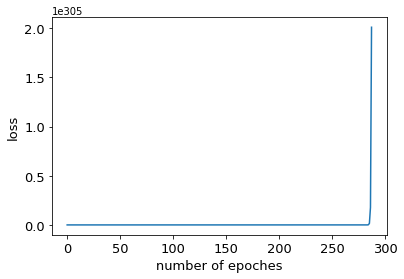

In [234]:
(loss_hist, w_hist) = gd_linear(w_init, 0.005)
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

Learning rate nhỏ

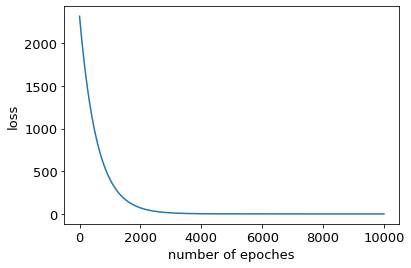

In [235]:
(loss_hist, w_hist) = gd_linear(w_init, 0.000001)
plt.plot(loss_hist)
plt.xlabel('number of epoches', fontsize=13)
plt.ylabel('loss', fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

# Bài 4

In [230]:
d = pd.read_csv('data_square.csv').values
x_raw = d[:, 0].reshape(-1, 1)
y_raw = d[:, 1].reshape(-1, 1)
N = x_raw.shape[0]

Biểu diễn dữ liệu

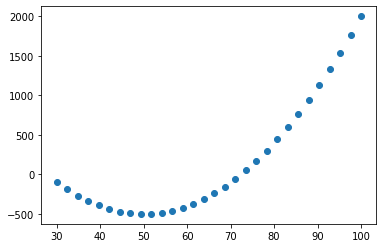

In [159]:
plt.scatter(x_raw, y)
plt.show()

Xây dựng model
<br>
Phương trình model có dạng y = a\*x^2 + b\*x +c
<br>
Đầu tiên, chuẩn hoá x và y về khoảng [0,1]

In [231]:
a, b = 0, 1
x = a + (x_raw - np.min(x_raw)) * (b-a) / (np.max(x_raw) - np.min(x_raw))

In [232]:
Xbar = np.concatenate((np.ones_like(x), x, x**2), axis=1)

In [233]:
y = (y_raw - np.min(y_raw)) / (np.max(y_raw) - np.min(y_raw))

Các hàm chính

In [249]:
def loss(w):
    return 0.5/N * (np.linalg.norm(Xbar.dot(w)-y)**2)


def grad(w):
    return 1/N * Xbar.T.dot(Xbar.dot(w)-y)


def gd_linear(w, lr):
    loss_hist = [loss(w)]
    
    for i in range(1000):
        w -= lr*grad(w)
        if np.linalg.norm(grad(w))/len(w) < 1e-5:
            break
        loss_hist.append(loss(w))

    return (w, loss_hist)


In [259]:
w_init = np.array([1.,1.,1.]).reshape(-1, 1)
(w, loss_hist) = gd_linear(w_init, 1.4)
print(w)
print(len(loss_hist))
print(loss_hist[-1])

[[ 0.15631604]
 [-1.09997412]
 [ 1.94089092]]
1001
1.2267374900671073e-06


Biểu diễn đường thẳng tìm được

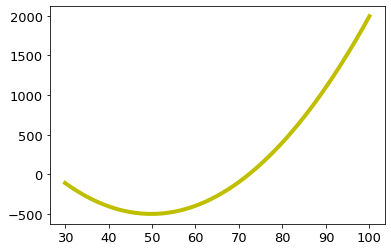

In [261]:
x0_raw = np.linspace(30, 100, 500, endpoint=True).reshape(-1,1)
a, b = 0, 1
x0 = a + (x0_raw - np.min(x0_raw)) * (b-a) / (np.max(x0_raw) - np.min(x0_raw))

X0 = np.concatenate((np.ones_like(x0), x0, x0**2), axis=1)
y0 = X0.dot(w)
y0_true = y0 * (np.max(y_raw) - np.min(y_raw)) + np.min(y_raw)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(x0_raw, y0_true, 'y', linewidth=4)
plt.show()

Tìm nghiệm bằng thư viện sklearn

In [218]:
X = np.concatenate((x, x**2), axis=1)
from sklearn.linear_model import LinearRegression
lrg = LinearRegression()
lrg.fit(X, y)
print(lrg.coef_, lrg.intercept_)

[[-1.12021617  1.96037715]] [0.1598404]
